In [1]:
import pandas as pd
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import io
from scipy import ndimage
import numpy as np

In [2]:
# DATA_PATH    = 'D:\ThesisData\data'
# CATALOG_PATH = 'D:\ThesisData/CATALOG.csv' 

In [3]:
# import h5py # needs conda/pip install h5py
# import matplotlib.pyplot as plt
# import pandas as pd  

DATA_PATH    = 'D:\ThesisData\data'
CATALOG_PATH = 'D:\ThesisData/CATALOG.csv'

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

Found 20273 events matching {'vil'}


## Load in file and images

In [23]:
import spear
file_Index = 13000

In [24]:
# Grab a sample event and view catalog entries
sample_event = events.get_group( event_ids[file_Index])
event_Number = event_ids[file_Index]
print('Sample Event:',event_Number)
# print(sample_event)
# file_name = sample_event.iloc[0,1]
vil = spear.read_data(sample_event, 'vil')
# file_name

Sample Event: R19062808567680


R19062808567680

In [25]:
# file_path = DATA_PATH + '/'+file_name
# print(file_path)

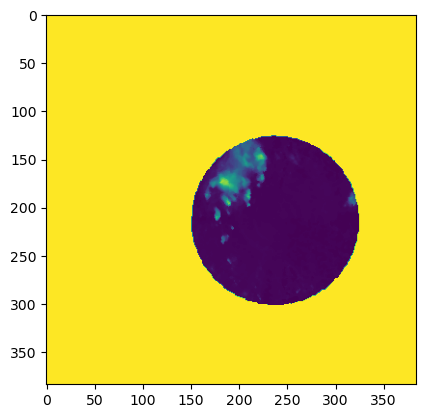

In [70]:
# file_index = 0
# with h5py.File(file_path,'r') as hf:
#     event_id = hf['id'][file_index]
#     vil      = hf['vil'][file_index] 
# print('Event ID:',event_id)

image = np.array(vil[:,:,48])
plt.imshow(image)

In [71]:
missingCount = np.count_nonzero(image == 255)
print('Percent Missing Data:', missingCount / image.size)

Percent Missing Data: 0.8374701605902778


## Binarize the images

In [8]:
from findEllipse import findEllipse

In [9]:
# Reformat to single line [Major1, Minor1, Angle1, Major2, Minor2...)
# weightedVals = weightedVals.reshape(9, order='F')

In [10]:
features = ['Major1', 'Minor1', 'Angle1', 'Major2', 'Minor2', 'Angle2', 'Major3', 'Minor3', 'Angle3']
# weightedDF = pd.DataFrame(columns=['Major1', 'Minor1', 'Angle1', 'Major2', 'Minor2', 'Angle2', 'Major3', 'Minor3', 'Angle3'])
# df = pd.DataFrame(columns=)
df = pd.DataFrame(0.0, index=np.arange(int(250/10)+1)*10, columns=features)
weightedDF = pd.DataFrame(0.0, index=np.arange(int(250/10)+1)*10, columns=features) 

In [11]:
# weightedDF
# print((weightedDF.iloc[0,:]).shape)
# print(weightedVals.shape)

In [12]:
for thresh in range(0,251, 10):
    vals = findEllipse(image, thresh)
    if vals != 0:
        weightedVals, unweightedVals = np.array(vals)
        weightedVals = weightedVals.reshape(9, order='F')
        unweightedVals = unweightedVals.reshape(9, order='F')
        weightedDF.loc[thresh,:] = weightedVals
        df.loc[thresh,:] = unweightedVals


KeyboardInterrupt



In [ ]:
# df

In [ ]:
# weightedDF.head(5)

In [ ]:
excel_file_name = 'thresholdChartEvent' + event_Number + '.xlsx'
print(excel_file_name)
out_path = "C:/Users/jared/OneDrive/Documents/Thesis/ThresholdCharts/" + excel_file_name
print(out_path)

In [ ]:
with pd.ExcelWriter(out_path) as writer:  
    weightedDF.to_excel(writer, sheet_name='Weighted')
    df.to_excel(writer, sheet_name='Unweighted')